<a href="https://colab.research.google.com/github/fauk74/Machine-Learning/blob/main/Principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality reduction: Principal Component Analysis, Linear Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/fauk74/Dataset/main/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [3]:
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [60]:
dataset.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [4]:
dataset.shape

(178, 14)

# Splitting Training Set and Test Set

In [5]:
#Splitting the dataset in training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

# Feature Scaling

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train1=pca.fit_transform(X_train, y_train)
X_test1=pca.transform(X_test)


In [48]:
X_train1[:10]

array([[-0.76907272,  2.3292186 ],
       [-1.27847104,  0.90680613],
       [-2.91848587, -1.52308826],
       [ 1.87100912, -0.73526979],
       [ 2.82096416, -1.46248211],
       [-1.72009179,  1.12470361],
       [ 1.23021026, -1.79370527],
       [ 2.61017488, -1.00884854],
       [ 2.19596386,  0.01434109],
       [-2.20828915, -1.08840099]])

In [64]:
pca.components_.shape

(2, 13)

In [74]:
n_components=dataset.shape[1]-1

In [77]:
# Showing the matrix of the weights

loadings = pd.DataFrame(
    pca.components_,  
    columns=dataset.columns[0:n_components],  #  the columns of the final dataframe transposed are the principal components
      #  the rows are the original features
).T
loadings

,0,1
Alcohol,0.145004,-0.495846
Malic_Acid,-0.239297,-0.235660
Ash,-0.015715,-0.283440
Ash_Alcanity,-0.251337,0.040023
Magnesium,0.136066,-0.256443
Total_Phenols,0.391130,-0.090014
Flavanoids,0.426048,-0.005472
Nonflavanoid_Phenols,-0.305892,-0.031343
Proanthocyanins,0.307774,-0.048469
Color_Intensity,-0.099326,-0.541373


# Random Forest Training

In [55]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_RF = classifier.predict(X_test1)
cm = confusion_matrix(y_test, y_pred_RF)
print(cm)
accuracy_score(y_test, y_pred_RF)

[[ 9  0  0]
 [ 1 12  0]
 [ 0  0  5]]


0.9629629629629629

In [40]:
!wget https://raw.githubusercontent.com/fauk74/Data-Visualization-and-Utility/main/helper_functions.py
from helper_functions import ColorMap2C

--2021-10-18 04:30:52--  https://raw.githubusercontent.com/fauk74/Data-Visualization-and-Utility/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15186 (15K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  14.83K  --.-KB/s    in 0s      

2021-10-18 04:30:52 (81.1 MB/s) - ‘helper_functions.py’ saved [15186/15186]



# Visualizing the training and the test results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


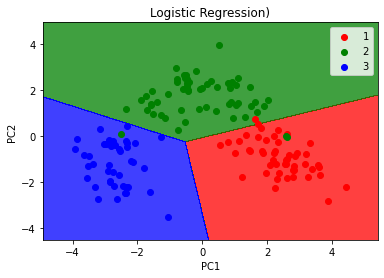

In [56]:
ColorMap2C('Logistic Regression)', classifier, X_train1, y_train)

In [42]:
from matplotlib.colors import ListedColormap

def ColorMap2C (title, classifier, X_set,y_set):
  from matplotlib.colors import ListedColormap
  """
  Plot a map contour of a set. The first variable is the title, the second the classifier, the second the X_set, the third y_set
  X has 2 components
  """
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  plt.title(title)
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.legend()
  plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


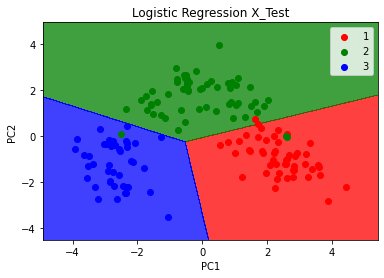

In [58]:
ColorMap2C('Logistic Regression X_Test', classifier, X_train1,y_train)

# Applying LDA

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [54]:
lda=LDA(n_components=2)
X_train2=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)